<a href="https://www.kaggle.com/sadiqueabdullah/wids-datathon2022?scriptVersionId=88411736" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv
/kaggle/input/eui-image/eui image.png


**Background**
Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use.

According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.

**Overview: the dataset and challenge**
The WiDS Datathon dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab). WiDS Datathon participants will analyze differences in building energy efficiency, creating models to predict building energy consumption. Participants will use a dataset consisting of variables that describe building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.

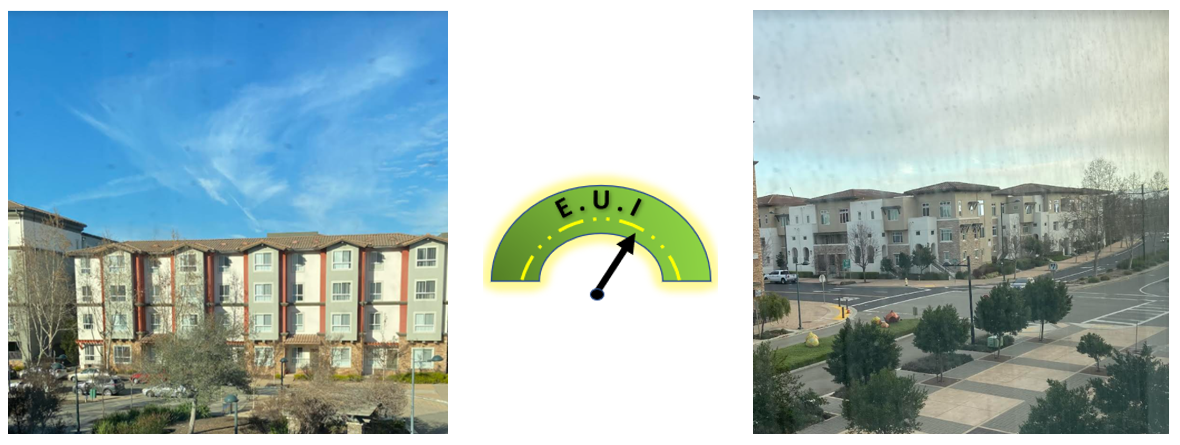

In [2]:
from IPython.display import Image
import os
("../input/eui-image/eui image.png")
Image("../input/eui-image/eui image.png")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [4]:
#Reading the Training dataset

train = pd.read_csv('../input/widsdatathon2022/train.csv')
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
train.shape

(75757, 64)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
# Reading the test dataset
test = pd.read_csv('../input/widsdatathon2022/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [8]:
# Checking the similarity between columns 'direction_max_wind_speed'& 'max_wind_speed'
print((~train.duplicated(subset=['direction_max_wind_speed','max_wind_speed','direction_peak_wind_speed'])).sum())


24


In [9]:
train['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6])

<AxesSubplot:title={'center':'% of missing values in columns'}>

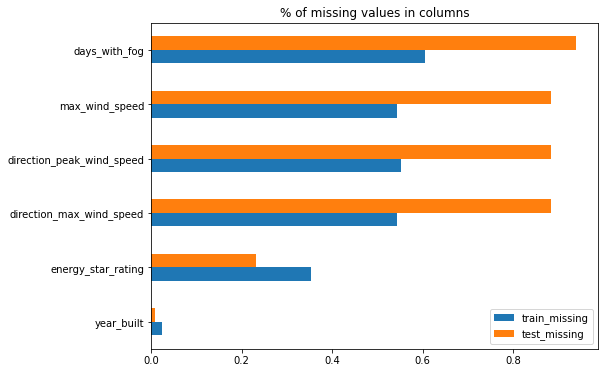

In [10]:
# Plotting the columns with null entries in train and test dataset

ncounts = pd.DataFrame([train.isna().mean(), test.isna().mean()]).T

ncounts = ncounts.rename(columns={0:"train_missing", 1: "test_missing"})
ncounts.query("train_missing > 0").plot(kind = 'barh', figsize= (8, 6), title = "% of missing values in columns")

In [11]:
#Making a dataset containing missing values in columns
na_cols = ['days_with_fog', 'max_wind_speed', 'direction_peak_wind_speed', 'direction_max_wind_speed', 'energy_star_rating','year_built']

<AxesSubplot:>

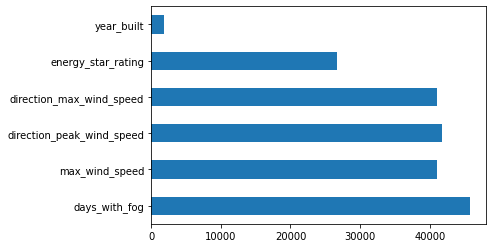

In [12]:
# How many missing values per observation
# train['n_missing'] =train[na_cols].isna().sum(axis=1)

# train['n_missing'].value_counts().plot(kind = 'bar')
(train[na_cols].isna().sum()).plot(kind= 'barh')


In [13]:
# Combining the test and train dataset as separate entity
train['isTrain'] = True
test['isTrain'] = False

total_df =pd.concat([train, test]). reset_index(drop=True).copy()

In [14]:
#checking the shape of 3 datasets

train.shape, test.shape, total_df.shape

((75757, 65), (9705, 64), (85462, 65))

# Creating Tag columns with missingvalue indicator

In [15]:
train_missing_tag = train[na_cols].isna()
train_missing_tag.columns = [f"{c}_missing" for c in train_missing_tag.columns]

In [16]:
#Concatenating the columns with missing tag identification
train = pd.concat([train, train_missing_tag], axis=1)

In [17]:
#Checking the EUI column
train['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

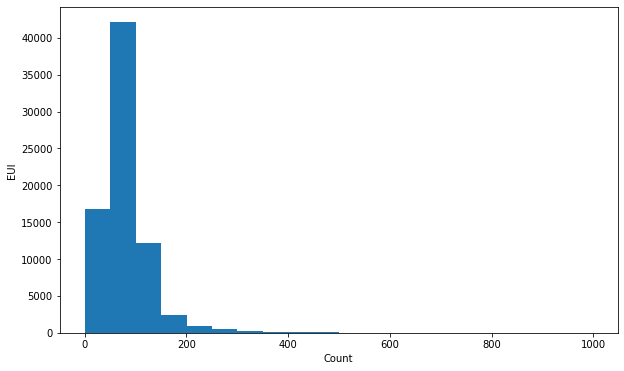

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('EUI')
plt.hist(train['site_eui'], bins = 20)
plt.show()

In [19]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                85462 non-null  int64  
 1   State_Factor               85462 non-null  object 
 2   building_class             85462 non-null  object 
 3   facility_type              85462 non-null  object 
 4   floor_area                 85462 non-null  float64
 5   year_built                 83533 non-null  float64
 6   energy_star_rating         56499 non-null  float64
 7   ELEVATION                  85462 non-null  float64
 8   january_min_temp           85462 non-null  int64  
 9   january_avg_temp           85462 non-null  float64
 10  january_max_temp           85462 non-null  int64  
 11  february_min_temp          85462 non-null  int64  
 12  february_avg_temp          85462 non-null  float64
 13  february_max_temp          85462 non-null  int

In [20]:
total_df['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [21]:
total_df['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

# categorical_transform():
le = LabelEncoder()

total_df['State_Factor_cat'] = le.fit_transform(total_df['State_Factor'].astype(str))
total_df['building_class_cat'] = le.fit_transform(total_df['building_class'].astype(str))
total_df['facility_type_cat'] = le.fit_transform(total_df['facility_type'].astype(str))

# train['days_with_fog_missing'] = le.fit_transform(train['days_with_fog_missing'])
# train['max_wind_speed_missing'] = le.fit_transform(train['max_wind_speed_missing'])
# train['direction_peak_wind_speed_missing'] = le.fit_transform(train['direction_peak_wind_speed_missing'])
# train['direction_max_wind_speed_missing'] = le.fit_transform(train['direction_max_wind_speed_missing'])
# train['energy_star_rating_missing'] = le.fit_transform(train['energy_star_rating_missing'])
# train['year_built_missing'] = le.fit_transform(train['year_built_missing'])


total_df = total_df.drop(columns = ['State_Factor', 'building_class', 'facility_type'], axis=1)

In [23]:
total_df['building_class_cat'].unique()

array([0, 1])

In [24]:
total_df.set_index('id')

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,isTrain,State_Factor_cat,building_class_cat,facility_type_cat
id,,,,,,,,,,,,,,,,,,,,,
0,1,61242.0,1942.0,11.0,2.4,36,50.50000,68,35,50.589286,...,0,1.0,1.0,1.0,NaN,248.682615,True,0,0,13
1,1,274000.0,1955.0,45.0,1.8,36,50.50000,68,35,50.589286,...,0,1.0,NaN,1.0,12.0,26.500150,True,0,0,55
2,1,280025.0,1951.0,97.0,1.8,36,50.50000,68,35,50.589286,...,0,1.0,NaN,1.0,12.0,24.693619,True,0,0,48
3,1,55325.0,1980.0,46.0,1.8,36,50.50000,68,35,50.589286,...,0,1.0,NaN,1.0,12.0,48.406926,True,0,0,6
4,1,66000.0,1985.0,100.0,2.4,36,50.50000,68,35,50.589286,...,0,1.0,1.0,1.0,NaN,3.899395,True,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,305925.0,2013.0,99.0,812.0,21,38.66129,54,28,41.625000,...,0,NaN,NaN,NaN,NaN,NaN,False,2,1,1
85458,7,34909.0,1910.0,94.0,26.5,21,38.66129,54,28,41.625000,...,0,NaN,NaN,NaN,NaN,NaN,False,2,1,1
85459,7,42393.0,2014.0,94.0,812.0,21,38.66129,54,28,41.625000,...,0,NaN,NaN,NaN,NaN,NaN,False,2,1,1


In [25]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                85462 non-null  int64  
 1   floor_area                 85462 non-null  float64
 2   year_built                 83533 non-null  float64
 3   energy_star_rating         56499 non-null  float64
 4   ELEVATION                  85462 non-null  float64
 5   january_min_temp           85462 non-null  int64  
 6   january_avg_temp           85462 non-null  float64
 7   january_max_temp           85462 non-null  int64  
 8   february_min_temp          85462 non-null  int64  
 9   february_avg_temp          85462 non-null  float64
 10  february_max_temp          85462 non-null  int64  
 11  march_min_temp             85462 non-null  int64  
 12  march_avg_temp             85462 non-null  float64
 13  march_max_temp             85462 non-null  int

In [26]:
total_df.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

In [27]:
total_df.isTrain.unique()

array([ True, False])

In [28]:
train = total_df[total_df['isTrain']==True]
test = total_df[total_df['isTrain']==False]

In [29]:
# finding the top 15 factors contributing to eui value
iv = abs(train.corr())
cor_sort = iv.sort_values(by = 'site_eui', ascending = False)
cor_sort=cor_sort['site_eui'][:15,]
cor_sort

site_eui               1.000000
energy_star_rating     0.511012
january_min_temp       0.179190
january_avg_temp       0.167982
State_Factor_cat       0.165703
snowfall_inches        0.157284
february_avg_temp      0.154071
heating_degree_days    0.147861
february_min_temp      0.147348
days_below_30F         0.139811
march_avg_temp         0.135303
march_min_temp         0.134110
july_avg_temp          0.133856
cooling_degree_days    0.125004
june_avg_temp          0.122019
Name: site_eui, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103

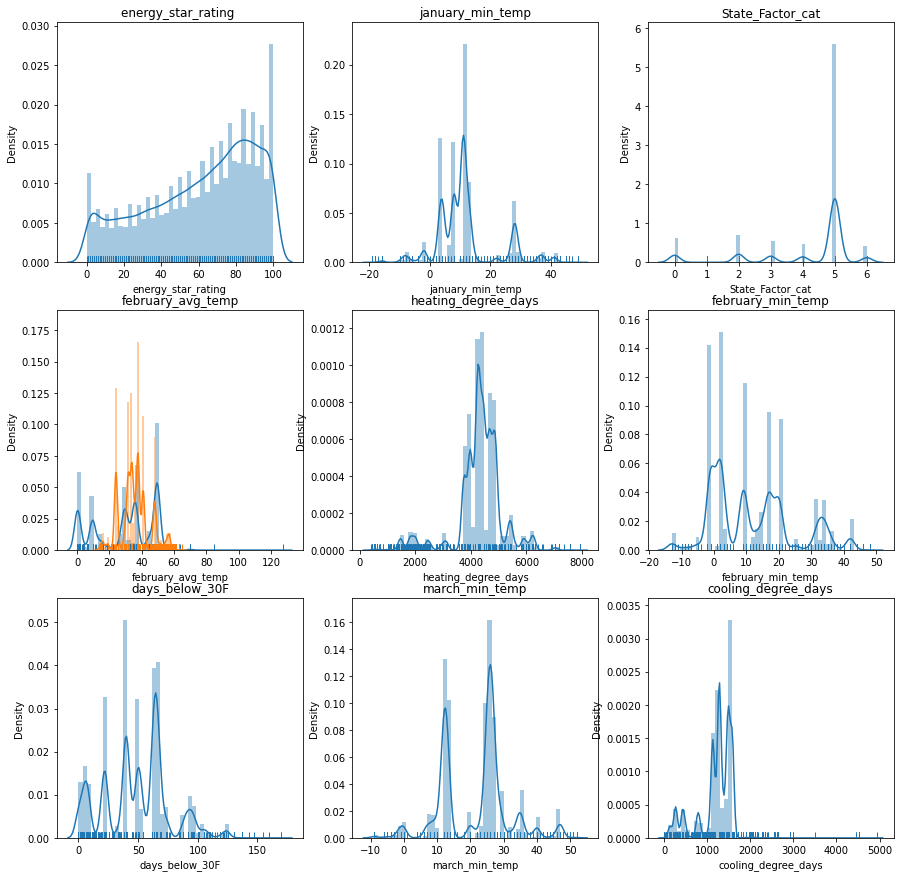

In [30]:
#Creating subplots for data Vizulization

plt.figure(figsize=(15, 15))

#Subplot1 
plt.subplot(3,3,1)
plt.title('energy_star_rating ')
sns.distplot(train['energy_star_rating'], rug = True)


#Subplot2
plt.subplot(3,3,2)
plt.title('january_min_temp')
sns.distplot(train['january_min_temp'], rug = True)


#Subplot3
plt.subplot(3,3,3)
plt.title('State_Factor_cat')
sns.distplot(train['State_Factor_cat'], rug = True)


#Subplot4
plt.subplot(3,3,4)
plt.title('snowfall_inches')
sns.distplot(train['snowfall_inches'], rug = True)

#Subplot4
plt.subplot(3,3,4)
plt.title('february_avg_temp')
sns.distplot(train['february_avg_temp'], rug = True)

#Subplot5
plt.subplot(3,3,5)
plt.title('heating_degree_days')
sns.distplot(train['heating_degree_days'], rug = True)

#Subplot6
plt.subplot(3,3,6)
plt.title('february_min_temp')
sns.distplot(train['february_min_temp'], rug = True)

#Subplot7
plt.subplot(3,3,7)
plt.title('days_below_30F')
sns.distplot(train['days_below_30F'], rug = True)

#Subplot8
plt.subplot(3,3,8)
plt.title('march_min_temp')
sns.distplot(train['march_min_temp'], rug = True)

#Subplot9
plt.subplot(3,3,9)
plt.title('cooling_degree_days')
sns.distplot(train['cooling_degree_days'], rug = True)

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

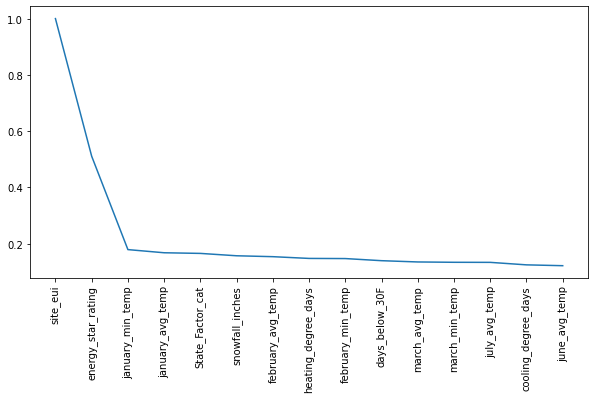

In [31]:
plt.figure(figsize=(10,5))
ax = plt.plot(cor_sort)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

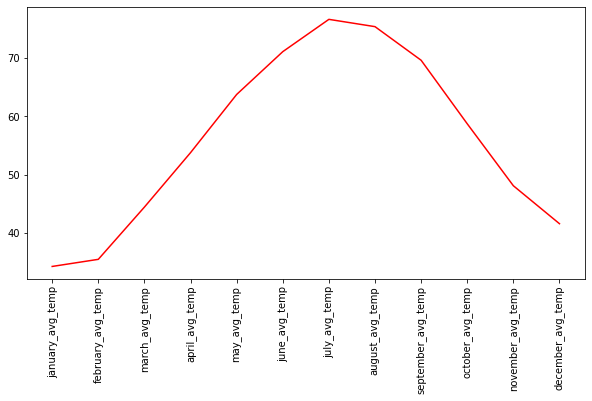

In [32]:
# plotting the month-wise temperature variation
plt.figure(figsize=(10,5))
max_temp_monthly = train[['january_max_temp','february_max_temp','march_max_temp', 'april_max_temp', 'may_max_temp', 'june_max_temp', 'july_max_temp','august_max_temp','september_max_temp', 'october_max_temp', 'november_max_temp','december_max_temp']]
min_temp_monthly = train[['january_min_temp','february_min_temp','march_min_temp', 'april_min_temp', 'may_min_temp', 'june_min_temp', 'july_min_temp','august_min_temp','september_min_temp', 'october_min_temp', 'november_min_temp','december_min_temp']]
avg_temp_monthly = train[['january_avg_temp','february_avg_temp','march_avg_temp', 'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp','august_avg_temp','september_avg_temp', 'october_avg_temp', 'november_avg_temp','december_avg_temp']]

plt.plot(avg_temp_monthly.mean(),  c='red')
plt.xticks(rotation = 90)

<AxesSubplot:>

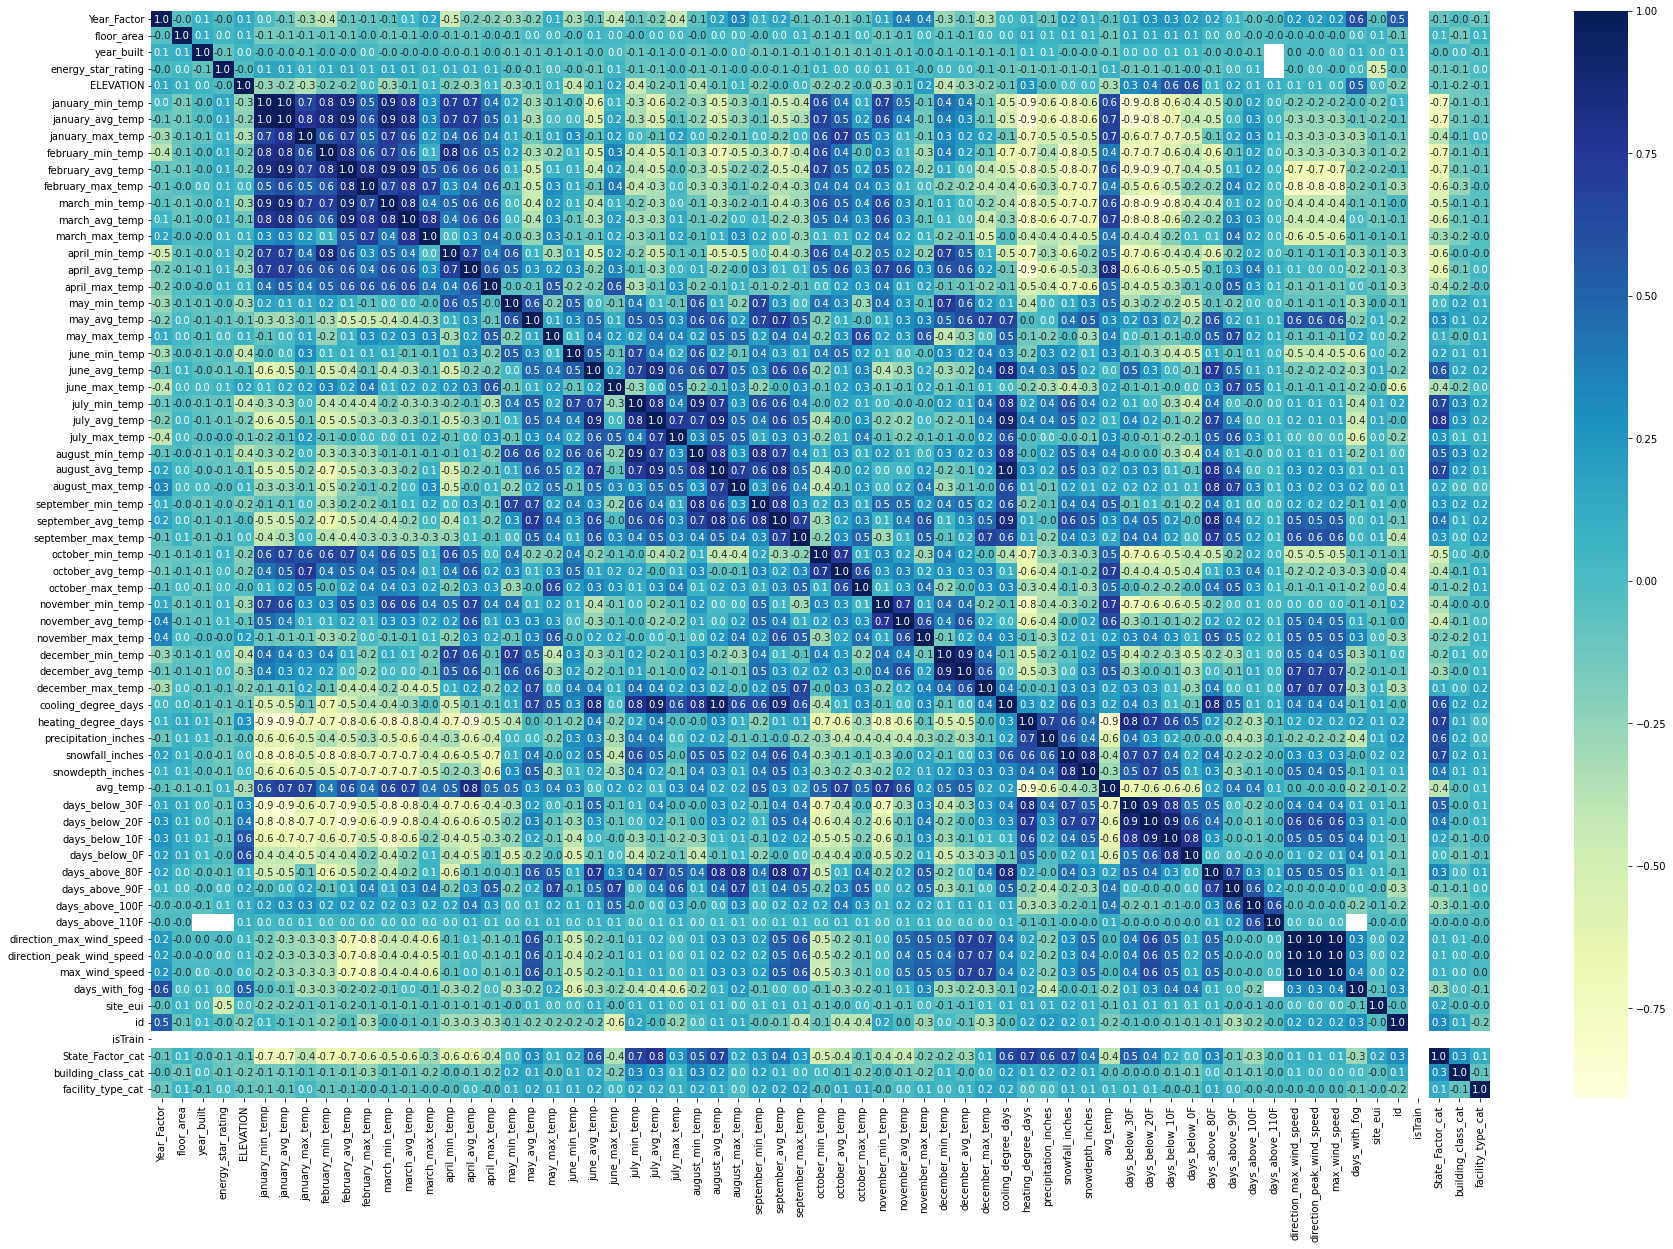

In [33]:
plt.figure(figsize=(30,20))
ix = train.corr()
sns.heatmap(ix, cmap = 'YlGnBu', annot=True,fmt='.1f')

# **Data Preparation**

# *****Step-1***** Imputing the Null/Nan entries

### **Method-1: Using Scikitlearn's SimpleImputer**

In [34]:
FEATURES =['id','Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
           'State_Factor_cat', 'building_class_cat',
       'facility_type_cat']

In [35]:
from sklearn.impute import SimpleImputer
imptr = SimpleImputer(strategy= "mean", add_indicator =False)

In [36]:
# fitting on all data
tt_impute = imptr.fit_transform(total_df[FEATURES])
tt_simple_impute = pd.DataFrame(tt_impute, columns=FEATURES).set_index('id')
tt_simple_impute.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,State_Factor_cat,building_class_cat,facility_type_cat
id,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,61242.0,1942.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,...,0.0,0.0,0.0,1.0,1.000000,1.0,109.94301,0.0,0.0,13.0
1.0,1.0,274000.0,1955.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,...,0.0,0.0,0.0,1.0,70.750627,1.0,12.00000,0.0,0.0,55.0
2.0,1.0,280025.0,1951.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,...,0.0,0.0,0.0,1.0,70.750627,1.0,12.00000,0.0,0.0,48.0
3.0,1.0,55325.0,1980.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,...,0.0,0.0,0.0,1.0,70.750627,1.0,12.00000,0.0,0.0,6.0
4.0,1.0,66000.0,1985.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,...,0.0,0.0,0.0,1.0,1.000000,1.0,109.94301,0.0,0.0,56.0


In [37]:
tt_simple_impute.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 85462 entries, 0.0 to 85461.0
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                85462 non-null  float64
 1   floor_area                 85462 non-null  float64
 2   year_built                 85462 non-null  float64
 3   energy_star_rating         85462 non-null  float64
 4   ELEVATION                  85462 non-null  float64
 5   january_min_temp           85462 non-null  float64
 6   january_avg_temp           85462 non-null  float64
 7   january_max_temp           85462 non-null  float64
 8   february_min_temp          85462 non-null  float64
 9   february_avg_temp          85462 non-null  float64
 10  february_max_temp          85462 non-null  float64
 11  march_min_temp             85462 non-null  float64
 12  march_avg_temp             85462 non-null  float64
 13  march_max_temp             85462 non-nul

### **Method-2: Using Scikitlearn's IterativeImputer**

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [39]:
it_imputer = IterativeImputer(max_iter=10)
train_iterimp = it_imputer.fit_transform(train[FEATURES])
test_iterimp = it_imputer.transform(test[FEATURES])
tt_iterimp = it_imputer.fit_transform(total_df[FEATURES])

# Create train test imputed dataframe
train_iter_df = pd.DataFrame(train_iterimp, columns=FEATURES).set_index('id')
test_iter_df = pd.DataFrame(test_iterimp, columns=FEATURES).set_index('id')
tt_iter_imp_df = pd.DataFrame(tt_iterimp, columns=FEATURES).set_index('id')


# *****Step-2***** Training and fitting the initial Models

In [40]:
#importing libraries for randomforest regression modelling
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
# fitting on training & test data for Simple Imputation

tr_imp = imptr.fit_transform(train[FEATURES])
test_imp = imptr.transform(test[FEATURES])


tr_imp_si = pd.DataFrame(tr_imp, columns=FEATURES).set_index('id')
test_imp_si = pd.DataFrame(test_imp, columns=FEATURES).set_index('id')


In [42]:
#Defining the predictor and target variables
X = tr_imp_si
y = train['site_eui']

#Splitting the data in Train & Test set
X_train,X_test,y_train,y_test= train_test_split(X, y, train_size=0.7, random_state=42)

# Model-1 :Training the Random Forest Model with Simple Imputation of Missing values in the dataset
regr = RandomForestRegressor(max_depth= 32,n_estimators=200,random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, n_estimators=200, random_state=42)

In [43]:
# Model-2: Training the XG boost model with Simple Imputation of Missing values in the dataset
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [44]:
# Training the XG Boost model with Iterative imputaion of missing values
X1 = train_iter_df
y1 = train['site_eui']

#Splitting the data in Train & Test set
X1_train,X1_test,y1_train,y1_test= train_test_split(X1, y1, train_size=0.7, random_state=42)

# Model-3: Training the XG boost model
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X1,label=y1)
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 5)

# Fitting the XG Boost Model
xg_reg1.fit(X1_train,y1_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# *****Step-3***** Predicting and checking the Model accuracy

In [45]:
# Predicting & Checking the accuracy of the Model-1
y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred, squared= False)

40.17743864668122

In [46]:
# Predicting & Checking the accuracy of the Model-2
preds = xg_reg.predict(X_test)
mean_squared_error(y_test, preds, squared= False)

58.254796041318976

In [47]:
# Predicting & Checking the accuracy of the Model-3
preds1 = xg_reg1.predict(X1_test)
mean_squared_error(y1_test, preds1, squared= False)

72.21653052182074

In [48]:
# Checking the accuracy on the Model-4 (Random forest model with Iterative imputation)
regr.fit(X1_train, y1_train)
y1_pred = regr.predict(X1_test)
mean_squared_error(y_test, y1_pred, squared= False)

41.31457614991814

# *****Step-4***** Checking the Feature importance

In [49]:
#Feature importance list Model-1 (Random Forest Regression)
import pandas as pd
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

,importance
energy_star_rating,0.255469
facility_type_cat,0.197348
floor_area,0.156468
year_built,0.107171
days_with_fog,0.047492
max_wind_speed,0.031355
direction_peak_wind_speed,0.023222
building_class_cat,0.022587
direction_max_wind_speed,0.022405
ELEVATION,0.020612


Text(0, 0.5, 'Importance value')

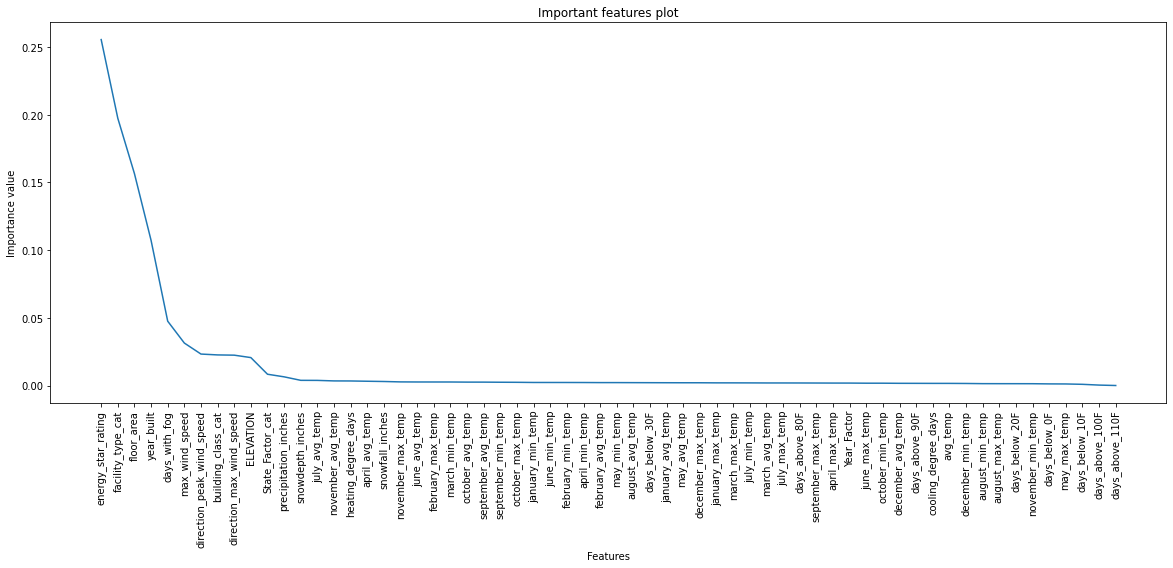

In [50]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.plot(feature_importances)
plt.title("Important features plot")
plt.xlabel("Features")
plt.ylabel("Importance value")

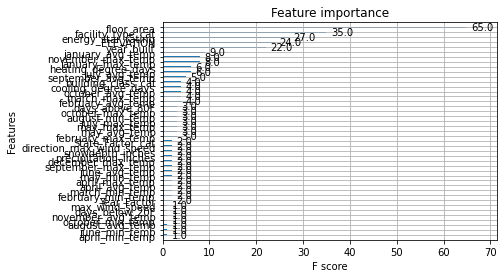

In [51]:
# Checking the Feature importance of Model-2 (XG Boost Model with Simple imputation of Null Values)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

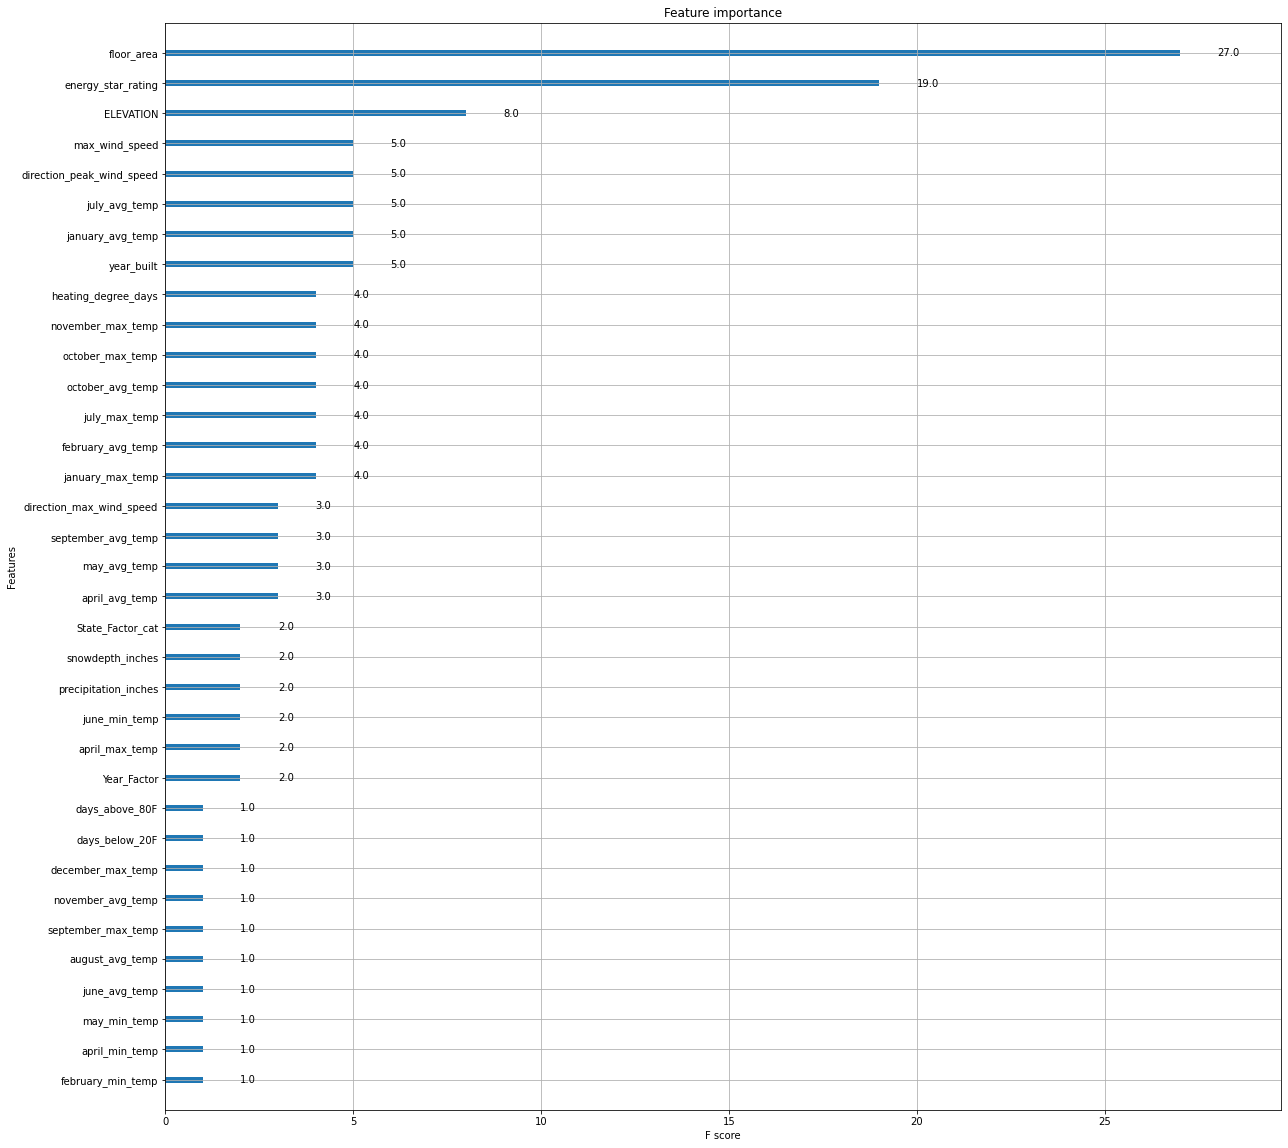

In [52]:
# Checking the Feature importance of Model-3 (XG Boost Model with Iterative imputation of Null Values)
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# *****Step-5***** Model tuning for prediction Accuracy improvement

In progress

In [53]:
test_imp_si.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,State_Factor_cat,building_class_cat,facility_type_cat
id,,,,,,,,,,,,,,,,,,,,,
75757.0,7.0,28484.0,1994.0,37.0,2.4,38.0,50.596774,64.0,40.0,54.482143,...,5.0,2.0,0.0,66.552675,62.779974,4.190601,109.142051,0.0,0.0,13.0
75758.0,7.0,21906.0,1961.0,55.0,45.7,38.0,50.596774,64.0,40.0,54.482143,...,5.0,2.0,0.0,66.552675,62.779974,4.190601,109.142051,0.0,0.0,13.0
75759.0,7.0,16138.0,1950.0,1.0,59.1,38.0,50.596774,64.0,40.0,54.482143,...,5.0,2.0,0.0,66.552675,62.779974,4.190601,109.142051,0.0,0.0,13.0
75760.0,7.0,97422.0,1971.0,34.0,35.4,38.0,50.596774,64.0,40.0,54.482143,...,5.0,2.0,0.0,66.552675,62.779974,4.190601,109.142051,0.0,0.0,13.0
75761.0,7.0,61242.0,1942.0,35.0,1.8,38.0,50.596774,64.0,40.0,54.482143,...,5.0,2.0,0.0,340.000000,330.000000,22.800000,126.000000,0.0,0.0,13.0


# *****Step-6***** Predicting the Test data

In [54]:
test_imp_si['site_eui1'] = regr.predict(test_imp_si)

In [55]:
test_imp_si1 = test_imp_si.reset_index()


(array([1.100e+02, 6.130e+02, 1.138e+03, 1.694e+03, 2.030e+03, 1.376e+03,
        9.760e+02, 4.800e+02, 4.320e+02, 2.540e+02, 1.210e+02, 1.060e+02,
        5.900e+01, 6.200e+01, 3.200e+01, 4.700e+01, 3.300e+01, 4.000e+01,
        3.600e+01, 2.200e+01, 1.900e+01, 7.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  4.14599791,  19.30721602,  34.46843413,  49.62965225,
         64.79087036,  79.95208847,  95.11330658, 110.27452469,
        125.4357428 , 140.59696092, 155.75817903, 170.91939714,
        186.08061525, 201.24183336, 216.40305147, 231.56426958,
        246.7254877 , 261.88670581, 277.04792392, 292.20914203,
        307.37036014, 322.53157825, 337.69279637, 352.85401448,
        368.01523259, 383.1764507 , 398.33766881, 413.49888692,
        428.66010503, 443.82132315, 458.98254126]),
 <BarContainer object of 30 artists>)

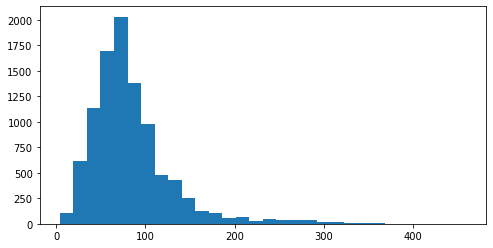

In [56]:
plt.figure(figsize= (8,4))
submission = test_imp_si1[['id', 'site_eui1']]
plt.hist(submission['site_eui1'], bins= 30)

In [57]:
test_imp_si2 = test_imp_si1.drop('site_eui1',1).set_index('id')
test_imp_si2['site_eui2'] = xg_reg.predict(test_imp_si2)
test_imp_si2 = test_imp_si2.reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(array([8.000e+00, 5.900e+01, 2.260e+02, 6.860e+02, 1.376e+03, 1.816e+03,
        1.913e+03, 1.678e+03, 8.320e+02, 3.610e+02, 1.610e+02, 1.980e+02,
        7.600e+01, 1.750e+02, 3.500e+01, 3.100e+01, 2.500e+01, 6.000e+00,
        8.000e+00, 1.500e+01, 1.000e+01, 6.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 21.260548,  25.446249,  29.631952,  33.817654,  38.003357,
         42.189056,  46.37476 ,  50.56046 ,  54.746162,  58.931866,
         63.117565,  67.30327 ,  71.48897 ,  75.674675,  79.860374,
         84.046074,  88.23178 ,  92.41748 ,  96.60318 , 100.78889 ,
        104.97459 , 109.160286, 113.345985, 117.53169 , 121.71739 ,
        125.90309 , 130.08879 , 134.2745  , 138.4602  , 142.6459  ,
        146.8316  ], dtype=float32),
 <BarContainer object of 30 artists>)

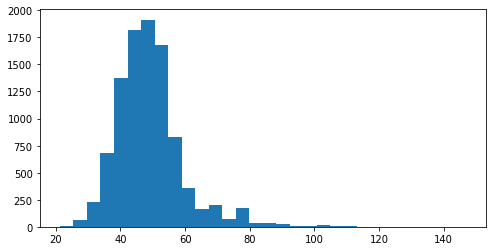

In [58]:
plt.figure(figsize= (8,4))
submission = test_imp_si2[['id', 'site_eui2']]
plt.hist(submission['site_eui2'], bins= 30)

In [59]:
test_imp_si3 = test_imp_si2.drop('site_eui2',1).set_index('id')
test_imp_si3['site_eui3'] = xg_reg1.predict(test_imp_si3)
test_imp_si3 = test_imp_si3.reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(array([4.000e+01, 2.450e+02, 3.360e+02, 8.640e+02, 1.567e+03, 9.220e+02,
        1.246e+03, 1.423e+03, 6.500e+02, 7.900e+02, 1.225e+03, 1.180e+02,
        6.600e+01, 7.800e+01, 1.200e+01, 1.400e+01, 4.400e+01, 1.500e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 2.400e+01,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([18.059439, 20.173046, 22.286654, 24.40026 , 26.513868, 28.627476,
        30.741085, 32.85469 , 34.9683  , 37.081905, 39.195515, 41.309124,
        43.42273 , 45.53634 , 47.649944, 49.763554, 51.87716 , 53.99077 ,
        56.104374, 58.217983, 60.33159 , 62.445198, 64.55881 , 66.67242 ,
        68.78602 , 70.89963 , 73.01324 , 75.12685 , 77.24045 , 79.35406 ,
        81.46767 ], dtype=float32),
 <BarContainer object of 30 artists>)

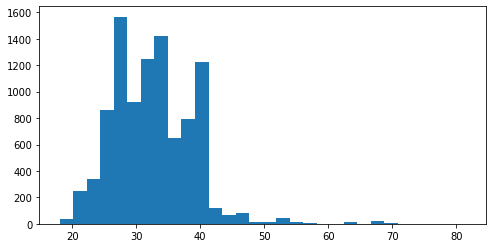

In [60]:
plt.figure(figsize= (8,4))
submission = test_imp_si3[['id', 'site_eui3']]
plt.hist(submission['site_eui3'], bins= 30)

In [61]:
submission = submission.rename(columns={"site_eui3": "site_eui"})
submission['id'] = submission['id'].astype(int)

In [62]:
submission

,id,site_eui
0,75757,32.018494
1,75758,23.876720
2,75759,59.382004
3,75760,29.740494
4,75761,33.435547
...,...,...
9700,85457,24.451008
9701,85458,37.632748
9702,85459,37.632748
9703,85460,40.597839


In [63]:
#Submission file
submission.to_csv('wids_submission.csv', index = False)

# *****Step-8***** Upload the submission